20150731 3095303


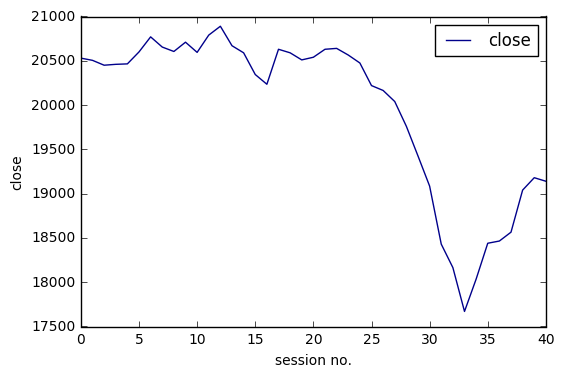

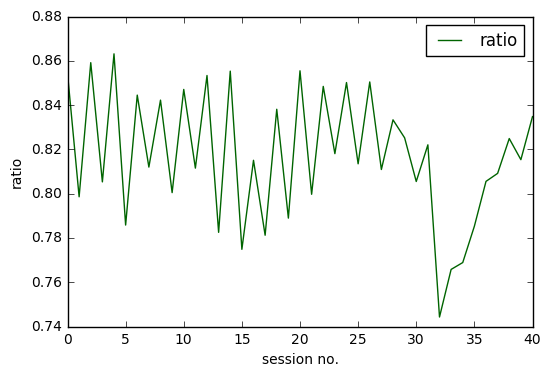

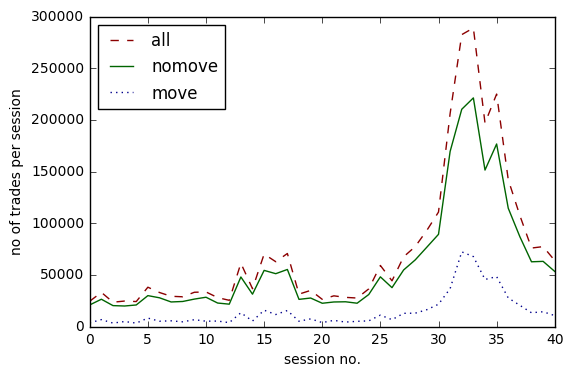

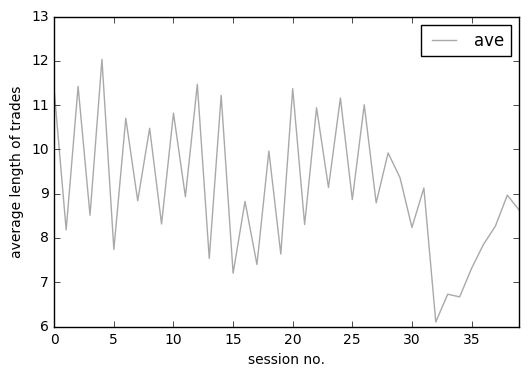

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime, date
import pandas as pd
import csv

def readcsv(file_name):
    trades=[]
    with open(file_name,'r') as f:
        series=csv.reader(f)
        n=0
        for line in series:
            trades.append([])
            for elements in line:
                trades[n].append(elements)
            n=n+1
    f.close()
    return trades

def analysis(trades):
    n_max=len(trades)
    forward=0
    yymmdd0=int(trades[0][0])
    results=[]
    ratio=[]
    p_c=[]
    zN=[]
    t=0
    for i in range(n_max-2):
        yymmdd=int(trades[i][0])
        hm=int(trades[i][1])
        if i>=forward:
            if hm==1900:# 米国時間、日本時間朝9：00
                jmax=0
                p99=float(trades[i][2])
                for j in range(n_max-i-1):
                    yymmdd9=int(trades[i+j+1][0])
                    hm9=int(trades[i+j+1][1])
                    p9=float(trades[i+j+1][2])
                    if hm9>=229 and yymmdd9>yymmdd:#実際の引けは日本時間午後3:15。
                        jmax=j
                        break
                price=trades[i:i+jmax+1]
            if hm==230:#日本時間午後4：30
                jmax=0
                p99=float(trades[i][2])
                for j in range(n_max-i-1):
                    p9=float(trades[i+j+1][2])
                    hm9=int(trades[i+j+1][1])
                    if hm9>=1301:#日本時間朝3時
                        jmax=j
                        break
                price=trades[i:i+jmax+1]
            if hm==1900 or hm==230:
                maxI=0
                minI=0
                count0=0
                count=0
                count1=0
                length=len(price)
                trade0=price[0][2]
                dp0=0
                for ii in range(1,len(price)):
                    trade=float(price[ii][2])
                    dp=int(trade)-int(trade0)
                    if trade==trade0:#価格の動きのない取引の計量
                        if dp0!=0:
                            count0+=1
                        count+=1
                    if trade!=trade0:
                        count1+=1
                    trade0=trade
                    dp0=dp
                p_c.append(trade)         #終値の保存
                results.append([])        #取引数の保存
                results[t].append(length) #全取引数
                results[t].append(count)  #非緊急性取引
                results[t].append(count1) #緊急性取引
                ratio.append(float(count)/float(length)) #非緊急性取引の割合
                count2=count0+count     #非緊急性の取引＋先頭の数
                if count2!=0:
                    zN.append(count2/count0)
                #print t,yymmdd,hm
                t+=1
            forward=i+j+1
        
    pclose=pd.DataFrame(p_c,columns=['close'])# 各立会の終値
    plt.figure(figsize=(6,4))
    pclose[:-1].plot(color='darkblue')
    plt.xlabel('session no.')
    plt.ylabel('close')
    r=pd.DataFrame(ratio,columns=['ratio'])   # 非緊急取引の比率
    plt.figure(figsize=(6,4))
    r[:-1].plot(color='darkgreen')
    plt.xlabel('session no.')
    plt.ylabel('ratio')
 
    results=pd.DataFrame(results,columns=['all','nomove','move'])#
    plt.figure(figsize=(6,4))
    results['all'][:-1].plot(color='darkred',linestyle='--',label='all')
    results['nomove'][:-1].plot(color='darkgreen',linestyle='-',label='nomove')
    results['move'][:-1].plot(color='darkblue',linestyle=':',label='move')
    plt.xlabel('session no.')
    plt.ylabel('no of trades per session')    #　取引の数
    plt.legend(loc='upper left')
    
    plt.figure(figsize=(6,4))
    zN=pd.DataFrame(zN,columns=['ave'])
    zN[:-1].plot(color='darkgray')
    plt.xlabel('session no.')
    plt.ylabel('average length of trades')    #　非緊急取引の取引の連続数

buf_path0="C:\\users\\moriya\\documents\\Database\\n225\\tick\\"
if __name__ == "__main__":
    filenames=["n225m201508Sep.csv"]
    filename=filenames[0]
    file_name=buf_path0+filename
    trades=readcsv(file_name)
    yymmdd=trades[0][0]
    print(yymmdd,len(trades))
    analysis(trades)


20150731 3095303


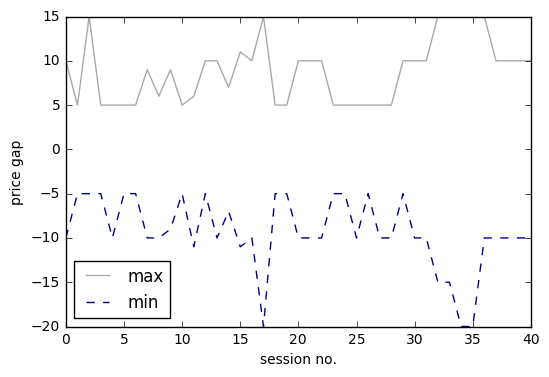

In [2]:
def analysis(trades):
    n_max=len(trades)
    forward=0
    yymmdd0=int(trades[0][0])
    results=[]
    I=[]
    zN=[]
    t=0
    for i in range(n_max-2):
        yymmdd=int(trades[i][0])
        hm=int(trades[i][1])
        if i>=forward:
            if hm==1900:# 米国時間、日本時間朝9：00
                jmax=0
                p99=float(trades[i][2])
                for j in range(n_max-i-1):
                    yymmdd9=int(trades[i+j+1][0])
                    hm9=int(trades[i+j+1][1])
                    p9=float(trades[i+j+1][2])
                    if hm9<=110:
                        jmax=j
                    if hm9>=229 and yymmdd9>yymmdd:#実際の引けは日本時間午後3:15。
                        break
                price=trades[i:i+jmax+1]
            if hm==230:#日本時間午後4：30
                jmax=0
                p99=float(trades[i][2])
                for j in range(n_max-i-1):
                    p9=float(trades[i+j+1][2])
                    hm9=int(trades[i+j+1][1])
                    if hm9<=1255:
                        jmax=j
                    if hm9>=1301:#日本時間朝3時
                        break
                price=trades[i:i+jmax+1]
            if hm==1900 or hm==230:
                maxI=0
                minI=0
                length=len(price)
                trade0=price[0][2]
                for ii in range(1,len(price)):
                    trade=float(price[ii][2])
                    dp=int(trade)-int(trade0)
                    if dp>maxI:
                        maxI=dp
                    if dp<minI:
                        minI=dp
                    trade0=trade
                I.append([])
                I[t].append(maxI)
                I[t].append(minI)
                t+=1
            forward=i+j+1
    I=pd.DataFrame(I,columns=['max','min'])
    I[:-1].plot(style=['-','--'],color=['darkgray','darkblue'])
    plt.xlabel('session no.')
    plt.ylabel('price gap')

#メインプログラム
buf_path0="C:\\users\\moriya\\documents\\Database\\n225\\tick\\"
if __name__ == "__main__":
    filenames=["n225m201508Sep.csv"]
    filename=filenames[0]
    file_name=buf_path0+filename
    trades=readcsv(file_name)
    yymmdd=trades[0][0]
    print(yymmdd,len(trades))
    analysis(trades)


20150731 3095303


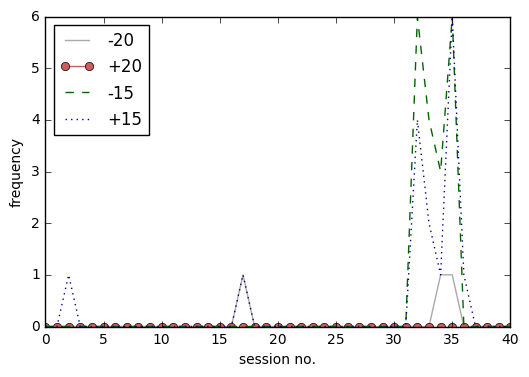

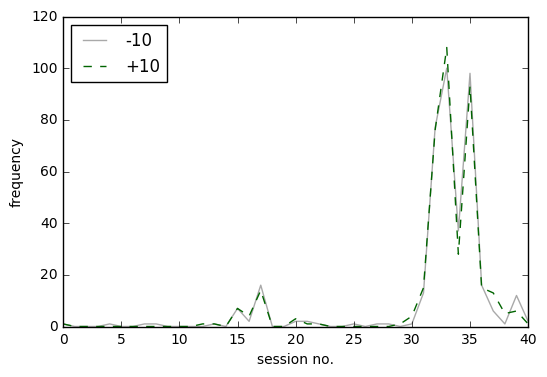

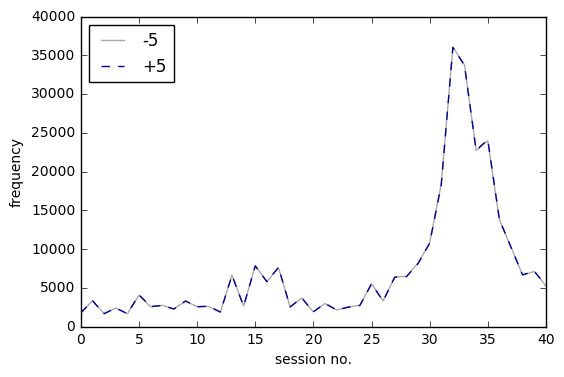

In [3]:
def analysis(trades):
    n_max=len(trades)
    forward=0
    yymmdd0=int(trades[0][0])
    results=[]
    I=[]
    zN=[]
    t=0
    for i in range(n_max-2):
        yymmdd=int(trades[i][0])
        hm=int(trades[i][1])
        if i>=forward:
            if hm==1900:# 米国時間、日本時間朝9：00
                jmax=0
                p99=float(trades[i][2])
                for j in range(n_max-i-1):
                    yymmdd9=int(trades[i+j+1][0])
                    hm9=int(trades[i+j+1][1])
                    p9=float(trades[i+j+1][2])
                    if hm9<=110:
                        jmax=j
                    if hm9>=229 and yymmdd9>yymmdd:#実際の引けは日本時間午後3:15。
                        break
                price=trades[i:i+jmax+1]
            if hm==230:#日本時間午後4：30
                jmax=0
                p99=float(trades[i][2])
                for j in range(n_max-i-1):
                    p9=float(trades[i+j+1][2])
                    hm9=int(trades[i+j+1][1])
                    if hm9<=1255:
                        jmax=j
                    if hm9>=1301:#日本時間朝3時
                        break
                price=trades[i:i+jmax+1]
            if hm==1900 or hm==230:
                length=len(price)
                trade0=price[0][2]
                tick=[0]*8
                for ii in range(1,length):
                    trade=float(price[ii][2])
                    dp=int(trade)-int(trade0)
                    for iii in range(4):
                        if iii*5-20==int(dp):
                            tick[iii]+=1
                        if iii*5+5==int(dp):
                            tick[iii+4]+=1
                    trade0=trade
                I.append([])
                for iii in range(len(tick)):
                    I[t].append(tick[iii])
                t+=1
            forward=i+j+1
    I=pd.DataFrame(I,columns=['m20','m15','m10','m5','p5','p10','p15','p20'])
    plt.figure(figsize=(6,4))
    I[:-1].m20.plot(label='-20',color='darkgray',linestyle='-')
    I[:-1].p20.plot(label='+20',color='indianred',marker='o')
    I[:-1].m15.plot(label='-15',color='darkgreen',linestyle='--')
    I[:-1].p15.plot(label='+15',color='darkblue',linestyle=':')
    plt.legend(loc='upper left')
    plt.xlabel('session no.')
    plt.ylabel('frequency')
    plt.figure(figsize=(6,4))
    I[:-1].m10.plot(label='-10',color='darkgray',linestyle='-')
    I[:-1].p10.plot(label='+10',color='darkgreen',linestyle='--')
    plt.xlabel('session no.')
    plt.ylabel('frequency')
    plt.legend(loc='upper left')
    plt.figure(figsize=(6,4))    
    I[:-1].m5.plot(label='-5',color='darkgray',linestyle='-')
    I[:-1].p5.plot(label='+5',color='darkblue',linestyle='--')
    plt.legend(loc='upper left')
    plt.xlabel('session no.')
    plt.ylabel('frequency')

#メインプログラム
buf_path0="C:\\users\\moriya\\documents\\Database\\n225\\tick\\"
if __name__ == "__main__":
    filenames=["n225m201508Sep.csv"]
    filename=filenames[0]
    file_name=buf_path0+filename
    trades=readcsv(file_name)
    yymmdd=trades[0][0]
    print(yymmdd,len(trades))
    analysis(trades)

20150731 3095303


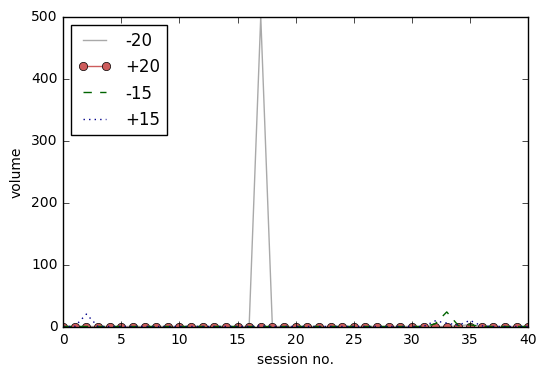

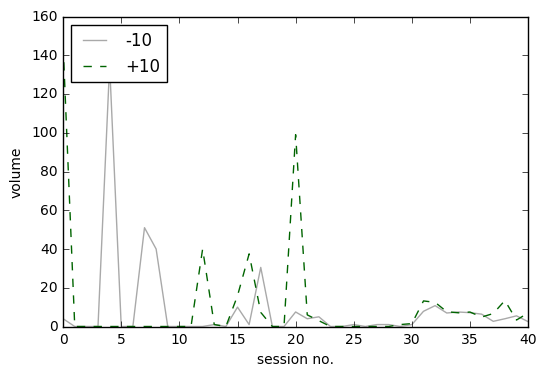

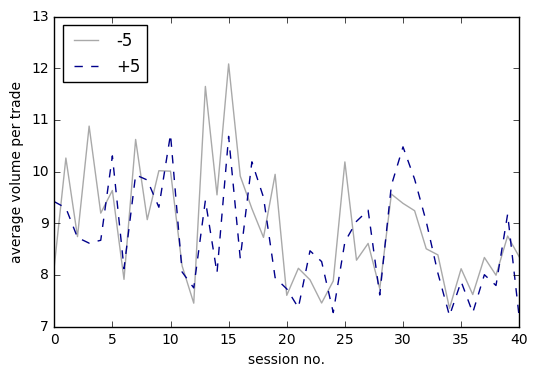

In [4]:
def analysis(trades):
    n_max=len(trades)
    forward=0
    yymmdd0=int(trades[0][0])
    results=[]
    I=[]
    zN=[]
    t=0
    for i in range(n_max-2):
        yymmdd=int(trades[i][0])
        hm=int(trades[i][1])
        if i>=forward:
            if hm==1900:# 米国時間、日本時間朝9：00
                jmax=0
                p99=float(trades[i][2])
                for j in range(n_max-i-1):
                    yymmdd9=int(trades[i+j+1][0])
                    hm9=int(trades[i+j+1][1])
                    p9=float(trades[i+j+1][2])
                    if hm9<=110:
                        jmax=j
                    if hm9>=229 and yymmdd9>yymmdd:#実際の引けは日本時間午後3:15。
                        break
                price=trades[i:i+jmax+1]
            if hm==230:#日本時間午後4：30
                jmax=0
                p99=float(trades[i][2])
                for j in range(n_max-i-1):
                    p9=float(trades[i+j+1][2])
                    hm9=int(trades[i+j+1][1])
                    if hm9<=1255:
                        jmax=j
                    if hm9>=1301:#日本時間朝3時
                        break
                price=trades[i:i+jmax+1]
            if hm==1900 or hm==230:
                length=len(price)
                trade0=price[0][2]
                tick=[0.0]*8
                volume=[0.0]*8
                for ii in range(1,length):
                    trade=float(price[ii][2])
                    v=float(price[ii][5])
                    dp=int(trade)-int(trade0)
                    for iii in range(4):
                        if iii*5-20==int(dp):#ティックが-20から-5まで
                            tick[iii]+=1
                            volume[iii]+=v
                        if iii*5+5==int(dp):#ティックが5から20まで
                            tick[iii+4]+=1
                            volume[iii+4]+=v
                    trade0=trade
                I.append([])
                for iii in range(len(tick)):
                    if tick[iii]!=0:
                        vv=volume[iii]/tick[iii]
                    else:
                        vv=0
                    I[t].append(vv)
                t+=1
            forward=i+j+1
    I=pd.DataFrame(I,columns=['m20','m15','m10','m5','p5','p10','p15','p20'])
    plt.figure(figsize=(6,4))
    I[:-1].m20.plot(label='-20',color='darkgray',linestyle='-')
    I[:-1].p20.plot(label='+20',color='indianred',marker='o')
    I[:-1].m15.plot(label='-15',color='darkgreen',linestyle='--')
    I[:-1].p15.plot(label='+15',color='darkblue',linestyle=':')
    plt.legend(loc='upper left')
    plt.xlabel('session no.')
    plt.ylabel('volume')
    plt.figure(figsize=(6,4))
    I[:-1].m10.plot(label='-10',color='darkgray',linestyle='-')
    I[:-1].p10.plot(label='+10',color='darkgreen',linestyle='--')
    plt.xlabel('session no.')
    plt.ylabel('volume')
    plt.legend(loc='upper left')
    plt.figure(figsize=(6,4))    
    I[:-1].m5.plot(label='-5',color='darkgray',linestyle='-')
    I[:-1].p5.plot(label='+5',color='darkblue',linestyle='--')
    plt.legend(loc='upper left')
    plt.xlabel('session no.')
    plt.ylabel('average volume per trade')
    plt.show()

#メインプログラム
buf_path0="C:\\users\\moriya\\documents\\Database\\n225\\tick\\"
if __name__ == "__main__":
    filenames=["n225m201508Sep.csv"]
    filename=filenames[0]
    file_name=buf_path0+filename
    trades=readcsv(file_name)
    yymmdd=trades[0][0]
    print(yymmdd,len(trades))
    analysis(trades)

20150731 3095303


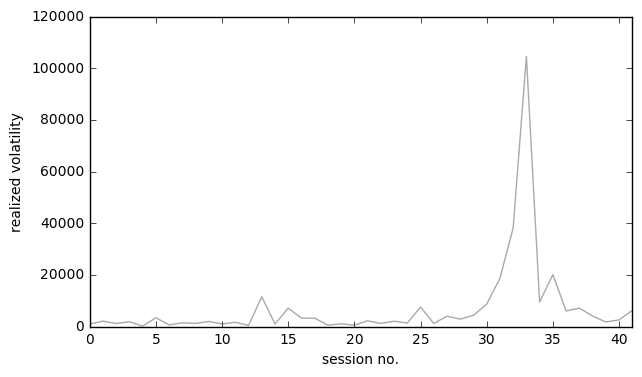

In [5]:
def analysis(trades):
    n_max=len(trades)
    forward=0
    yymmdd0=int(trades[0][0])
    results=[]
    I=[]
    zN=[]
    t=0
    for i in range(n_max-2):
        yymmdd=int(trades[i][0])
        hm=int(trades[i][1])
        if i>=forward:
            if hm==1900:# 米国時間、日本時間朝9：00
                jmax=0
                p99=float(trades[i][2])
                for j in range(n_max-i-1):
                    yymmdd9=int(trades[i+j+1][0])
                    hm9=int(trades[i+j+1][1])
                    p9=float(trades[i+j+1][2])
                    if hm9<=110:
                        jmax=j
                    if hm9>=229 and yymmdd9>yymmdd:#実際の引けは日本時間午後3:15。
                        break
                price=trades[i:i+jmax+1]
            if hm==230:#日本時間午後4：30
                jmax=0
                p99=float(trades[i][2])
                for j in range(n_max-i-1):
                    p9=float(trades[i+j+1][2])
                    hm9=int(trades[i+j+1][1])
                    if hm9<=1255:
                        jmax=j
                    if hm9>=1301:#日本時間朝3時
                        break
                price=trades[i:i+jmax+1]
            if hm==1900 or hm==230:
                length=len(price)
                trade0=float(price[0][2])
                hh0=int(int(price[0][1])/100)
                rv=0.0
                nrv=0
                for ii in range(1,length):
                    trade=float(price[ii][2])
                    hh=int(int(price[ii][1])/100)
                    if hh!=hh0:
                        rv+=(trade-trade0)**2
                        trade0=trade
                        nrv+=1
                    hh0=hh
                rv=rv/nrv
                I.append(rv)
                t+=1
            forward=i+j+1
    I=pd.DataFrame(I,columns=['rv'])
    plt.figure(figsize=(7,4))
    I.rv.plot(color='darkgray')
    plt.xlabel('session no.')
    plt.ylabel('realized volatility')

#メインプログラム
buf_path0="C:\\users\\moriya\\documents\\Database\\n225\\tick\\"

if __name__ == "__main__":
    filenames=["n225m201508Sep.csv"]
    filename=filenames[0]
    file_name=buf_path0+filename
    trades=readcsv(file_name)
    yymmdd=trades[0][0]
    print(yymmdd,len(trades))
    analysis(trades)
